In [7]:
import numpy as np
import matplotlib.pyplot as plt

R_Earth = 6378.1
Date = 2022.057534246575342465

def read_file(filename):
    f = open(filename, 'r')
    Zeta = []
    Xi = []
    MinDistAft = []
    tMinDistAft = []
    for line in f:
        if "B-plane distance" in line:
            line = line.strip().split()
            Zeta.append(float(line[4]))
            Xi.append(float(line[6]))
            MinDistAft.append(float(line[10]))
            tMinDistAft.append(float(line[12]))
    f.close()
    return (Zeta, Xi, MinDistAft, tMinDistAft)

def subtract(L1,L2): 
    return [x1-x2 for x1,x2 in zip(L1,L2)] 


In [15]:
# Read in data and merge simulation runs for LOV along and against track

Zeta29F, Xi29F, MinDAft29F, tMinDAft29F = read_file('nomfor29goodlog')
Zeta360F, Xi360F, MinDAft360F, tMinDAft360F = read_file('0for36goodlog')
Zeta3610F, Xi3610F, MinDAft3610F, tMinDAft3610F = read_file('tenfor36goodlog')
Zeta36F, Xi36F, MinDAft36F, tMinDAft36F = read_file('nomfor36goodlog')
Zeta29, Xi29, MinDAft29, tMinDAft29 = read_file('nomback29goodlog')
Zeta360, Xi360, MinDAft360, tMinDAft360 = read_file('0back36goodlog')
Zeta3610, Xi3610, MinDAft3610, tMinDAft3610 = read_file('tenback36goodlog')
Zeta36np, Xi36np, MinDAft36np, tMinDAft36np = read_file('nom36bplane')
Zeta36, Xi36, MinDAft36, tMinDAft36 = read_file('nomback36goodlog')
Zeta36ytnp, Xi36ytnp, MinDAft36ytnp, tMinDAft36ytnp = read_file('yarten36bplane')
Zeta36y0np, Xi36y0np, MinDAft36y0np, tMinDAft36y0np = read_file('yar036bplane')
Zeta36gr, Xi36gr, MinDAft36gr, tMinDAft36gr = read_file('noGR')
Zeta36gh, Xi36gh, MinDAft36gh, tMinDAft36gh = read_file('noGH')
Zeta36rf, Xi36rf, MinDAft36rf, tMinDAft36rf = read_file('noRF')
Zeta36T, Xi36T, MinDAft36T, tMinDAft36T = read_file('noThisbe')
Zeta36D, Xi36D, MinDAft36D, tMinDAft36D = read_file('noDavida')


Zeta36n = Zeta36F + Zeta36
MinDAft36n = MinDAft36F + MinDAft36
tMinDAft36n = tMinDAft36F + tMinDAft36
Zeta36z = Zeta360F + Zeta360
MinDAft36z = MinDAft360F + MinDAft360
tMinDAft36z = tMinDAft360F + tMinDAft360
Zeta36t = Zeta3610F + Zeta3610
MinDAft36t = MinDAft3610F + MinDAft3610
tMinDAft36t = tMinDAft3610F + tMinDAft3610
Zeta29n = Zeta29 + Zeta29F
MinDAft29n = MinDAft29 + MinDAft29F
tMinDAft29n = tMinDAft29F + tMinDAft29

Nominal solution for perturbed 2036 Zeta: -46985841.22163099 km



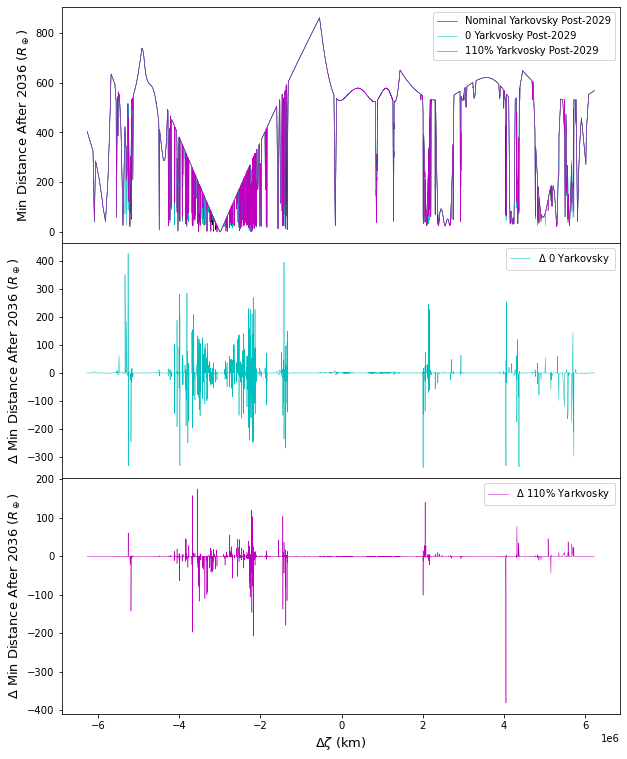

In [22]:
nomval = Zeta36F[0]
print(f"Nominal solution for perturbed 2036 Zeta: {nomval} km\n")

data= list(zip(Zeta36n,MinDAft36n))
data.sort(key=lambda tup: tup[0])
x_val = [x[0]-nomval for x in data]
y_val = [x[1] for x in data]
y_val = np.array(y_val)/R_Earth

data0= list(zip(Zeta36z,MinDAft36z))
data0.sort(key=lambda tup: tup[0])
x_val0 = [x[0]-nomval for x in data0]
y_val0 = [x[1] for x in data0]
y_val0 = np.array(y_val0)/R_Earth

data10= list(zip(Zeta36t,MinDAft36t))
data10.sort(key=lambda tup: tup[0])
x_val10 = [x[0]-nomval for x in data10]
y_val10 = [x[1] for x in data10]
y_val10 = np.array(y_val10)/R_Earth

diff0 = subtract(MinDAft36n, MinDAft36z)
diff10 = subtract(MinDAft36n, MinDAft36t)

datadiff= list(zip(Zeta36n,diff0))
datadiff.sort(key=lambda tup: tup[0])
x_valdiff = [x[0]-nomval for x in datadiff]
y_valdiff = [x[1] for x in datadiff]
y_valdiff = np.array(y_valdiff)/R_Earth

datadiff1= list(zip(Zeta36n,diff10))
datadiff1.sort(key=lambda tup: tup[0])
x_valdiff1 = [x[0]-nomval for x in datadiff1]
y_valdiff1 = [x[1] for x in datadiff1]
y_valdiff1 = np.array(y_valdiff1)/R_Earth

fig = plt.figure(figsize=(10,13))
gs = fig.add_gridspec(3, hspace=0,wspace=0)
fg = gs.subplots(sharex='col')

#fg[0].set_title('2036 Close Approach Structure Comparison')
fg[0].plot(x_val,y_val, 'k', linewidth=0.5, label='Nominal Yarkovsky Post-2029')
fg[0].plot(x_val0,y_val0, 'c', linewidth=0.5, label='0 Yarkvosky Post-2029')
fg[0].plot(x_val10,y_val10, 'm', linewidth=0.5, label='110% Yarkvosky Post-2029')
fg[0].set_ylabel('Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[0].legend()
fg[1].plot(x_valdiff, y_valdiff, 'c', linewidth=0.5, label='$\Delta$ 0 Yarkovsky')
fg[1].set_ylabel('$\Delta$ Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[1].legend()
fg[2].plot(x_valdiff1, y_valdiff1, 'm', linewidth=0.5, label='$\Delta$ 110% Yarkvosky')
fg[2].set_xlabel('$\Delta\zeta$ (km)', fontsize=13)
fg[2].set_ylabel('$\Delta$ Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[2].legend()
plt.show()

In [ ]:
diffbz360 = Zeta36y0np[0] - Zeta36np[0]
diffbz3610 = Zeta36ytnp[0] - Zeta36np[0]
diffbz36GR = Zeta36gr[0] - Zeta36np[0]
diffbz36GH = Zeta36gh[0] - Zeta36np[0]
diffbz36RF = Zeta36rf[0] - Zeta36np[0]
diffbz36This = Zeta36T[0] - Zeta36np[0]
diffbz36Dav = Zeta36D[0] - Zeta36np[0]

diffbx360 = Xi36y0np[0] - Xi36np[0]
diffbx3610 = Xi36ytnp[0]- Xi36np[0]
diffbx36GR = Xi36gr[0] - Xi36np[0]
diffbx36GH = Xi36gh[0] - Xi36np[0]
diffbx36RF = Xi36rf[0] - Xi36np[0]
diffbx36This = Xi36T[0] - Xi36np[0]
diffbx36Dav = Xi36D[0] - Xi36np[0]

print(f'''Differences in 2036 Zeta: 
Yarkovsky 0% {diffbz360:.2f}km, {diffbz360/Zeta36np[0]},
Yarkovsky 110% {diffbz3610:.2f}km, {diffbz3610/Zeta36np[0]},
No GR {diffbz36GR:.2f}km, {diffbz36GR/Zeta36np[0]},
No gravitational harmonics {diffbz36GH:.2f}km, {diffbz36GH/Zeta36np[0]},
No radiation forces (beta) {diffbz36RF:.2f}km, {diffbz36RF/Zeta36np[0]},
No asteroids Thisbe or smaller {diffbz36This:.2f}km, {diffbz36This/Zeta36np[0]},
No asteroids Davida or smaller {diffbz36Dav:.2f}km, {diffbz36Dav/Zeta36np[0]}

Differences in 2036 Xi: 
Yarkovsky 0% {diffbx360:.2f}km, {diffbx360/Xi36np[0]},
Yarkovsky 110% {diffbx3610:.2f}km, {diffbx3610/Xi36np[0]},
No GR {diffbx36GR:.2f}km, {diffbx36GR/Xi36np[0]},
No gravitational harmonics {diffbx36GH:.2f}km, {diffbx36GH/Xi36np[0]},
No radiation forces (beta) {diffbx36RF:.2f}km, {diffbx36RF/Xi36np[0]},
No asteroids Thisbe or smaller {diffbx36This:.2f}km, {diffbx36This/Xi36np[0]},
No asteroids Davida or smaller {diffbx36Dav:.2f}km {diffbx36Dav/Xi36np[0]}''')

print(f'Nominal Zeta: {Zeta36np}, Nominal Xi: {Xi36np}')

Nominal solution for perturbed 2029 Zeta: 47360.046681998516 km


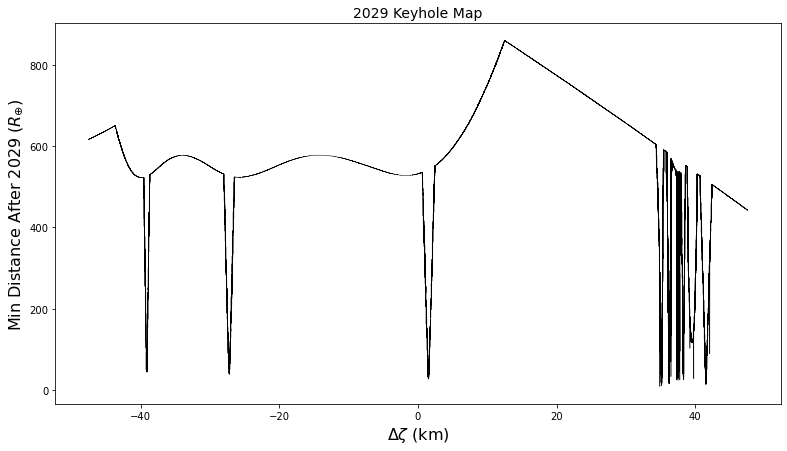

In [24]:
nomval29 = Zeta29F[0]
print(f"Nominal solution for perturbed 2029 Zeta: {nomval29} km")

data29= list(zip(Zeta29n,MinDAft29n))
data29.sort(key=lambda tup: tup[0])
x_val29 = [x[0] for x in data29]
x_val29 = np.array(x_val29) - nomval29
y_val29 = [x[1] for x in data29]
y_val29 = np.array(y_val29)/R_Earth

plt.figure(figsize=(13,7))
plt.plot(x_val29,y_val29, 'k', linewidth=0.5)
plt.title('2029 Keyhole Map', fontsize=14)
plt.xlabel('$\Delta\zeta$ (km)', fontsize=16)
plt.ylabel('Min Distance After 2029 ($R_{\oplus}$)', fontsize=16)
#plt.xlim(34,45)
#plt.plot(np.linspace(-45,45,100), np.ones(100)*100)
plt.show()

In [13]:
# Calculating the close approach resonant spike info for 2029:
data29 = list(zip(Zeta29n,MinDAft29n, tMinDAft29n))
data29.sort(key=lambda tup: tup[0])
data29 = np.array(data29)
CA29 = data29[np.where(data29[:,1]<(100*R_Earth))]
CA29[:,0] = CA29[:,0]-Zeta29F[0]
# Search for specific resonant spikes:
keyhole = CA29[np.where((CA29[:,0]>36) & (CA29[:,0]<37))]
print('Delta zeta for resonant spike', np.mean(keyhole[:,0]))
print('Date of close approach', np.mean(keyhole[:,2])+Date)
print('Minimum distance for close approach (earth radii)',min(keyhole[:,1])/R_Earth)
print('Number of asteroids in spike',len(keyhole))

Delta zeta for resonant spike 36.255139773269185
Date of close approach 2102.695321857591
Minimum distance for close approach (earth radii) 15.561352341763822
Number of asteroids in spike 25


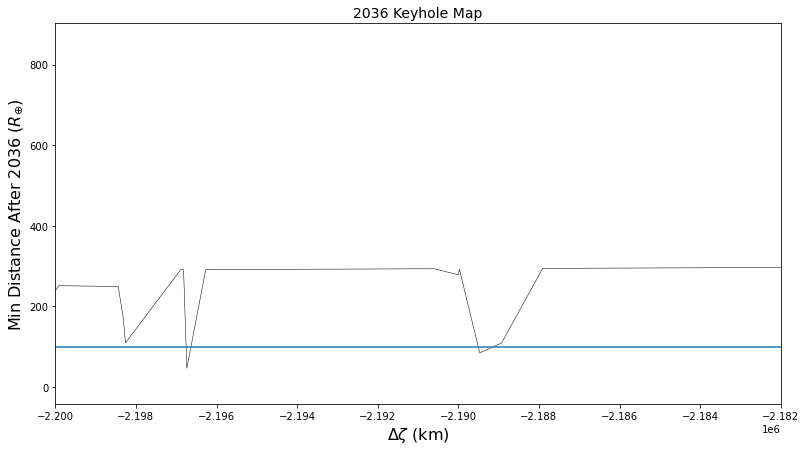

In [90]:
plt.figure(figsize=(13,7))
plt.plot(x_val,y_val, 'k', linewidth=0.5)
plt.title('2036 Keyhole Map', fontsize=14)
plt.xlabel('$\Delta\zeta$ (km)', fontsize=16)
plt.ylabel('Min Distance After 2036 ($R_{\oplus}$)', fontsize=16)
plt.xlim(-2.2e6,-2.182e6)
plt.plot(np.linspace(-6.2e6,6.2e6,10000), np.ones(10000)*100)
plt.show()

In [87]:
# Calculating the close approach resonant spike info for 2036:
data36 = list(zip(Zeta36n,MinDAft36n, tMinDAft36n))
data36.sort(key=lambda tup: tup[0])
data36 = np.array(data36)
CA36 = data36[np.where(data36[:,1]<(100*R_Earth))]
CA36[:,0] = CA36[:,0]-Zeta36F[0]
# Search for specific resonant spikes:
keyhole = CA36[np.where((CA36[:,0]>-2.181e6) & (CA36[:,0]<-2.179e6))]
print('Delta zeta for resonant spike', np.mean(keyhole[:,0]))
print('Date of close approach', np.mean(keyhole[:,2])+Date)
print('Minimum distance for close approach (earth radii)',min(keyhole[:,1])/R_Earth)
print('Number of asteroids in spike',len(keyhole))

Delta zeta for resonant spike -2180110.2830776125
Date of close approach 2109.2835858966682
Minimum distance for close approach (earth radii) 62.69654027590261
Number of asteroids in spike 1
